# Apple cultivars

* **Data:** `apples.csv`
* **Description:** Types of apples
* **Source:** https://en.wikipedia.org/wiki/List_of_apple_cultivars
* **Columns of interest:**
    * `Common name` - the non-scientific name of the apple cultivar
    * `Origin` - where it came from
    * `First developed` - year it was developed
    * `Comment` - Description
    * `Use` - whether best for eating, baking, etc

Note that you'll need to brush up on `.str.contains` for this notebook.

## Read in your data

In [153]:
import pandas as pd
import numpy as np

df = pd.read_csv("apples.csv")

In [154]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

## Clean up the "First developed" column

Sometimes it's a year and sometimes it is an "introduced" year, like `Introduced 1826`. We just want all of them to be years, so feel free to remove the "Introduced" part.

In [155]:
#Replacing the "Introduced " in the first developed column and converting it to int
df.first_developed = df.first_developed.str.replace("Introduced ", "").astype(float)

## What percentage of apples are just for eating?

In [156]:
round(df.use.value_counts(normalize=True) * 100, 2)

Eating                           57.55
Cooking                          13.09
Cooking, Eating                   9.45
Eating, Cooking                   5.91
Cider                             1.09
                                 ...  
Cooking (Apple Juice), Eating     0.09
Cider, Cooking Eating             0.09
Eating, Cooking, Drying           0.09
Cooking, (Eating)                 0.09
Eating, cider, juice              0.09
Name: use, Length: 72, dtype: float64

## Apples are from Kazakhstan, but they've spread since ancient times: calculate the top seven countries for apple cultivars in this dataset

In [157]:
df.origin.value_counts().head(7)

US         321
England    278
Germany     75
France      38
Sweden      35
Canada      32
Russia      17
Name: origin, dtype: int64

## Plot them with the longest bar at the top

<AxesSubplot:>

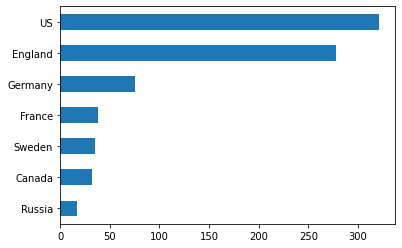

In [158]:
df.origin.value_counts().head(7).sort_values().plot(kind='barh')

## For apples described as "small" in their comment section, how often are they just for eating?

In [159]:
small = df[df.comment.str.contains("small", na=False)]

small.use.value_counts()

Eating                      22
Cooking                      3
Cider                        2
Eating, Cooking              2
Cooking, Eating              2
Eating, Cooking, Dessert     1
Eating, Cooking, Baking      1
Cooking, Eating.             1
Name: use, dtype: int64

## Save a CSV of just apples from Sweden, calling it `sweden.csv`

In [160]:
sweden = df[df.origin == "Sweden"]

sweden.to_csv("sweden.csv", index=False)

In [161]:
#Reading the csv
pd.read_csv("sweden.csv")

,common_name,origin,first_developed,comment,use
0,Åkerö,Sweden,1759.0,"Apple is egg-shaped, medium to large in size, ...",Eating
1,Alice,Sweden,1964.0,Medium size. Yellow with red stripes. Flesh ju...,Eating
2,Aroma,Sweden,1947.0,"A yellow apple with red flush. W 63, H 58. P I...",Eating
3,Birgit Bonnier,Sweden,1992.0,A cross between Cortland (apple) and Lord Lamb...,NaN
4,Fagerö,Sweden,1860.0,"W 75-80, H 68. A red mutant of Grågylling. Use...",Eating
5,Flickäpple,Sweden,1850.0,A large cooking apple. Yellow with red stripes...,Cooking
6,Frösåker,Sweden,1900.0,A yellow apple. W 58-63. H 45-50. Stalk 12mm. ...,Eating
7,Gunilla Bohuslän,Sweden,1900.0,"W 98, H 98. Stalk 21 mm. Use October - March.","Eating, Cooking"
8,Hanaskogsäpple,Sweden,1873.0,"A yellow apple. W 61, H 54. Pick September. Us...",Eating
9,Himmelstalund,Sweden,1870.0,"W 75, H 58. Flesh juicy, aromatic. Use October...",Eating


## What was the first apple cultivar from Japan?

In [172]:
#Firsr identify where origin is Japan.
#Then sort by first developed

df[df.origin == "Japan"].sort_values(by='first_developed')


,common_name,origin,first_developed,comment,use
1122,Washu 1984,Japan,1920.0,Conical with light green skin and dark freckle...,Eating
244,Crispin,Japan,1930.0,See Mutsu,Eating
400,Fuji,Japan,1930.0,"P Red Delicious × Ralls Genet. Dark red, conic...",Eating
749,Mutsu,Japan,1930.0,"Known as ""Crispin"" in the United Kingdom. W 73...",Eating
1087,Tsugaru,Japan,1930.0,Golden Delicious × Jonathan,Eating
786,Orin,Japan,1952.0,Sweet and distinctive fragrance. Notes of pine...,Eating
11,Akane,Japan,1970.0,Jonathan × Worcester Pearmain. Tangy taste.,Eating
484,Hatsuaki,Japan,1976.0,"P Jonathan x Golden Delicious. Flesh juicy, sw...",Eating
969,Shinano Sweet,Japan,1978.0,mid-season crops. Tsugaru x Fuji,Eating


## How old are these apple cultivars?

You could use `.describe()`, but I want a graph. **What kind of chart do you use?** I want to see a graph that shows me a summary when these cultivars were discovered/introduced, not a graph of each individual one's year of introduction.

<AxesSubplot:>

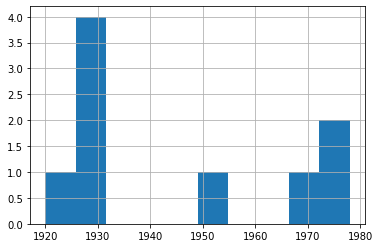

In [179]:
japan.first_developed.hist()

## How old are most apple cultivars that are used for creating cider?

Cider used to be a big deal, so I would assume they're older. Include **anything that includes "Cider" anywhere in the `Use` description**. Make a graph, same as the last question.

In [180]:
cider = df[df.use.str.contains("cider", case=False, na=False)]


<AxesSubplot:>

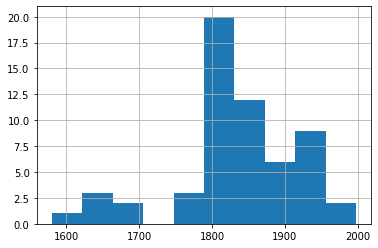

In [181]:
cider.first_developed.hist()